In [31]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np

In [32]:
#Cargamos el archivo airbnb.csv
data= pd.read_csv('diamonds.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,NaN,58.0,2757.0,6.15,6.12,3.74


In [3]:
#Identificamos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

**Limpieza de Nulos por la media**

In [33]:
mean_carat=data['carat'].mean() 
data['carat'].fillna(value=mean_carat, inplace=True) 

mean_depth=data['depth'].mean() 
data['depth'].fillna(value=mean_carat, inplace=True) 

mean_table=data['table'].mean() 
data['table'].fillna(value=mean_table, inplace=True) 

mean_price=data['price'].mean() 
data['price'].fillna(value=mean_price, inplace=True) 

mean_x=data['x'].mean() 
data['x'].fillna(value=mean_x, inplace=True) 

mean_y=data['y'].mean() 
data['y'].fillna(value=mean_y, inplace=True) 

mean_z=data['z'].mean() 
data['z'].fillna(value=mean_z, inplace=True) 

In [34]:
valores_nulos=data.isnull().sum().sum()
valores_nulos

0

**Limpieza de Outliers**

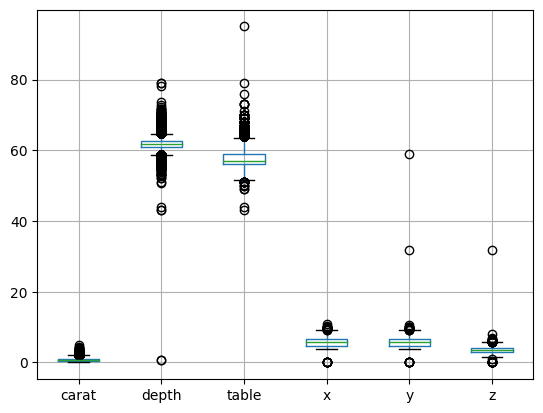

In [39]:
boxplot = data.boxplot(column=['carat', 'depth', 'table','x','y','z'])  

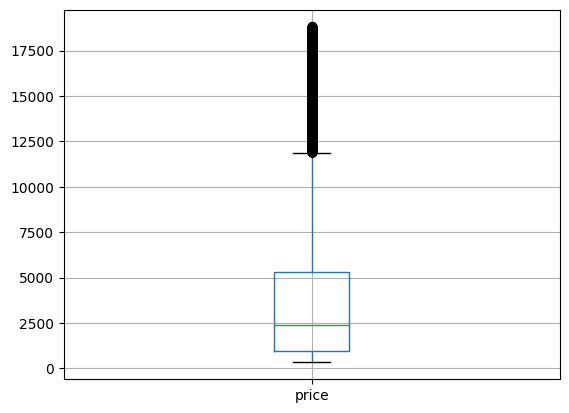

In [36]:
boxplot = data.boxplot(column=['price'])  

In [25]:
#Carat
#Desviación Estandar

y=data["carat"]
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)
#Encontramos Ouliers
outliers_carat= data[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_carat

Limite superior permitido 2.219952792940675
Limite inferior permitido -0.6240898417198061


,carat,cut,color,clarity,depth,table,price,x,y,z
13757,2.22,Fair,J,I1,66.7,56.0,5607.0,8.04,8.02,5.36
14138,2.27,Fair,J,I1,67.6,55.0,5733.0,8.05,8.00,5.43
15684,2.49,Fair,J,I1,66.3,58.0,6289.0,8.26,8.18,5.45
16283,3.00,Very Good,H,I1,63.1,55.0,6512.0,9.23,9.10,5.77
16439,2.22,Fair,H,I1,70.1,55.0,6564.0,7.77,7.74,5.44
...,...,...,...,...,...,...,...,...,...,...
27727,2.61,Ideal,I,SI2,62.1,56.0,18756.0,8.85,8.73,5.46
27731,2.55,Premium,I,VS1,61.8,62.0,18766.0,8.70,8.65,5.36
27739,2.80,Good,G,SI2,63.8,58.0,18788.0,8.90,8.85,0.00
27744,2.29,Premium,I,SI1,61.8,59.0,18797.0,8.52,8.45,5.24


/var/folders/s5/9tn200911wjfzyc3b8q58s900000gn/T/ipykernel_4278/947708970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["carat"]=data2["carat"].fillna(round(data2["carat"].mean(),2))


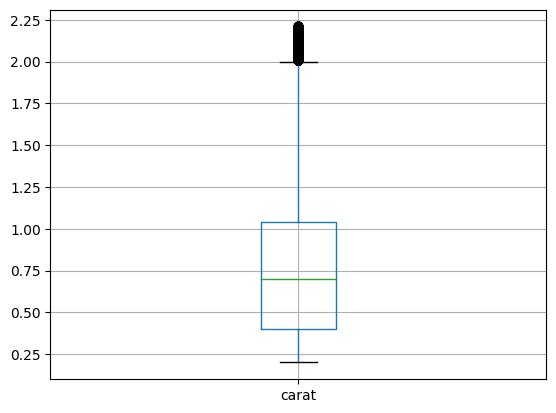

In [30]:
data2=data[(y<=Limite_Superior)&(y>=Limite_Inferior)] 
data2["carat"]=data2["carat"].fillna(round(data2["carat"].mean(),2))

boxplot = data2.boxplot(column=['carat'])